# **Exploratory Data Analysis**

In [1]:
from pathlib import Path
from typing import Dict, Optional
import pandas as pd
import json

In [2]:
demo = pd.read_csv('data/Demographics.csv')
demo

,ID,Gender,HbA1c
0,13,MALE,5.7
1,1,FEMALE,5.5
2,3,FEMALE,5.9
3,4,FEMALE,6.4
4,5,FEMALE,5.7
5,2,MALE,5.6
6,6,FEMALE,5.8
7,7,FEMALE,5.3
8,8,FEMALE,5.6
9,10,FEMALE,6.0


| **HbA1c (%)**         | **Interpretation**              |
|----------------------|----------------------------------|
| Below 5.7%           | Normal / Non-Diabetic            |
| 5.7% to 6.4%         | Prediabetes                      |
| 6.5% or higher       | Diabetes                         |


All participants in our dataset seem to be mostly prediabetic and normal-ish.

## 🩸 Understanding HbA1c: A Marker of Long-Term Glucose Control

**HbA1c** (glycated hemoglobin) reflects the average blood glucose level over the past **2 to 3 months**. It's a standard biomarker used in clinical settings to assess metabolic health and diagnose diabetes.



### 📊 HbA1c Ranges and Their [Clinical Interpretation](https://diabetes.org/about-diabetes/a1c)

| **HbA1c (%)**     | **Interpretation**                                      |
|------------------|----------------------------------------------------------|
| **4.6% – 5.2%**   | Excellent control — very healthy, often athletic individuals |
| **5.3% – 5.6%**   | Normal glycemic control — healthy general population     |
| **5.7% – 6.4%**   | Prediabetic — elevated risk for Type 2 Diabetes          |
| **≥ 6.5%**        | Diabetic — meets diagnostic threshold                    |

### 🧠 Insights

- The **average non-diabetic adult** typically has an HbA1c between **5.3% and 5.6%**
- **Lower values** (e.g. 4.6%–5.0%) are often seen in people with **high insulin sensitivity**, low-carb diets, or frequent physical activity
- Values **below 4.5%** are rare and may indicate **non-glucose-related medical conditions** (e.g. anemia, short RBC lifespan)

---

### 📍 Participant 001

| **ID** | **Gender** | **HbA1c** | **Interpretation**        |
|--------|------------|-----------|----------------------------|
| 001    | Female     | **5.5%**   | Healthy / Normal (non-diabetic) |

> Participant 001's HbA1c value of **5.5%** falls within the **normal range**, indicating typical glucose control. While not in the ultra-low "elite" range, this value reflects good metabolic health and no indication of diabetes or prediabetes.



To simplify things a bit for now, I'm just gonna do glucose spikes + heart rate + electrodermal activity for participant `001`.
- Plans to do this for all participants should be explored too.

In [36]:
demo[demo['ID'] == 1] # normal (still considered normal)

,ID,Gender,HbA1c
1,1,FEMALE,5.5


# 📈 Understanding Glucose Spikes

## What is a Glucose Spike?

A **glucose spike** refers to a rapid and often sharp **increase in blood glucose levels following a meal**. This phenomenon is most commonly observed 30 to 120 minutes after eating, especially after carbohydrate-rich meals.

From a physiological perspective, glucose spikes reflect:
- How quickly carbohydrates are digested and absorbed
- How the body (specifically insulin) responds
- Interactions with other factors like stress, sleep, or activity

While transient, these spikes have **important metabolic consequences**, especially in the context of:
- Insulin sensitivity
- Energy crashes
- Long-term risks for Type 2 diabetes and cardiovascular disease

---

## Why Glucose Spikes Matter

Postprandial glucose responses — that is, blood sugar *after eating* — are increasingly recognized as a **key metric in metabolic health**. Traditional markers like fasting glucose or HbA1c don't fully capture the impact of glucose excursions throughout the day.

Studies have shown that:
- **Frequent high spikes** are associated with increased oxidative stress (Monnier et al., 2006)
- Larger post-meal excursions are linked to **higher cardiovascular risk** (Ceriello et al., 2004)
- Two individuals eating the *same food* can have *very different glucose spikes* (Zeevi et al., 2015, *Cell*) — due to differences in sleep, stress, microbiome, and activity

---

## How We Measured Glucose Spikes

Using **continuous glucose monitor (CGM)** data from the Dexcom G6, we defined a meal’s glucose spike as:

$
\text{Glucose Spike} = \max(\text{glucose}_{0\text{-}2hr}) - \text{mean}(\text{glucose}_{-30\text{min}\text{ to }0})
$

- The **baseline** is the average glucose in the 30 minutes *before* the meal
- The **spike** is the peak glucose value in the 2 hours *after* the meal starts

This is a simplified and interpretable approach inspired by real-world CGM studies. It's conceptually aligned with what clinicians refer to as a **postprandial glucose excursion**.

---

## References

- [Monnier, L. et al. (2006)](https://pubmed.ncbi.nlm.nih.gov/16609090/). *Activation of oxidative stress by acute glucose fluctuations compared with sustained chronic hyperglycemia in patients with type 2 diabetes.* Diabetes Care.
- [Ceriello, A. et al. (2024)](https://pubmed.ncbi.nlm.nih.gov/16934443/). *Postprandial hyperglycemia and cardiovascular complications of diabetes: an update* Diabetes Metab.
- [Zeevi, D. et al. (2015)](https://pubmed.ncbi.nlm.nih.gov/26590418/). *Personalized nutrition by prediction of glycemic responses.* Cell.
- American Diabetes Association (ADA). *[Standards of Medical Care in Diabetes](https://professional.diabetes.org/standards-of-care) – 2024.*

---

This spike definition serves as the foundation for our exploratory analyses and visualizations throughout this notebook.


### Participant 001

In [3]:
# === Dexcom (Glucose) ===
dexcom_df = pd.read_csv("data/001/Dexcom_001.csv", skiprows=range(1, 13))
dexcom_df.columns = dexcom_df.columns.str.strip()
dexcom_df["datetime"] = pd.to_datetime(dexcom_df["Timestamp (YYYY-MM-DDThh:mm:ss)"], errors="coerce")
dexcom_df = dexcom_df.rename(columns={"Glucose Value (mg/dL)": "glucose"})
dexcom_df = dexcom_df[["datetime", "glucose"]].dropna()

In [4]:
dexcom_df

,datetime,glucose
0,2020-02-13 17:23:32,61.0
1,2020-02-13 17:28:32,59.0
2,2020-02-13 17:33:32,58.0
3,2020-02-13 17:38:32,59.0
4,2020-02-13 17:43:31,63.0
...,...,...
2556,2020-02-22 17:33:23,139.0
2557,2020-02-22 17:38:23,141.0
2558,2020-02-22 17:43:23,143.0
2559,2020-02-22 17:48:22,139.0


In [5]:
type(dexcom_df['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
# === Heart Rate ===
# Step 1: Load and clean column names
hr_df = pd.read_csv("data/001/HR_001.csv")
hr_df.columns = hr_df.columns.str.strip()

# Step 2: Convert datetime strings to actual datetime objects
hr_df["datetime"] = pd.to_datetime(hr_df["datetime"], errors="coerce")

# Step 3: Standardize the HR column name (assumes it's the second column)
hr_df = hr_df.rename(columns={hr_df.columns[1]: "hr"})

# Step 4: Floor to nearest minute (for consistent grouping)
hr_df["datetime"] = hr_df["datetime"].dt.floor("min")

# Step 5: Average HR per minute
hr_df = hr_df.groupby("datetime")["hr"].mean().reset_index()

# Preview the cleaned result
# hr_df.head()

C:\Users\rsl\AppData\Local\Temp\ipykernel_21648\2079746607.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hr_df["datetime"] = pd.to_datetime(hr_df["datetime"], errors="coerce")


In [7]:
type(hr_df['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
# === Electrodermal Activity  ===
# Step 1: Load and strip column names
eda_df = pd.read_csv("data/001/EDA_001.csv")
eda_df.columns = eda_df.columns.str.strip()

# Step 2: Convert datetime column to actual datetime objects
eda_df["datetime"] = pd.to_datetime(eda_df["datetime"], errors="coerce")

# Step 3: Standardize the EDA column name (assumes it's the second column)
eda_df = eda_df.rename(columns={eda_df.columns[1]: "eda"})

# Step 4: Round to nearest minute
eda_df["datetime"] = eda_df["datetime"].dt.floor("min")

# Step 5: Average EDA per minute
eda_df = eda_df.groupby("datetime")["eda"].mean().reset_index()

# Preview
# eda_df.head()

In [9]:
# Step 1: Load food_log_tagged and group food items into meals
import json

with open("data/food_log_tagged.json") as f:
    food_data = json.load(f)

food_df = pd.DataFrame(food_data)
food_df["datetime"] = pd.to_datetime(food_df["datetime"], errors="coerce")

# Group by (ID, datetime) to define meals
grouped_meals = food_df.groupby(["ID", "datetime"]).agg({
    "time_begin": "first",
    "calorie": "sum",
    "total_carb": "sum",
    "dietary_fiber": "sum",
    "sugar": "sum",
    "protein": "sum",
    "total_fat": "sum",
    "tags": lambda x: sorted(set(tag for sublist in x if isinstance(sublist, list) for tag in sublist))
}).reset_index()

# Clean and parse time_begin
grouped_meals["time_begin"] = pd.to_datetime(grouped_meals["time_begin"], errors="coerce")

In [10]:
grouped_meals.head(10)

,ID,datetime,time_begin,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,tags
0,001,2020-02-13 18:00:00,2020-02-13 18:00:00,456.0,85.0,1.7,83.0,16.0,3.3,"[drink, healthy, vegan, vegetarian]"
1,001,2020-02-13 20:30:00,2020-02-13 20:30:00,488.0,2.5,1.2,0.8,63.4,23.1,"[dinner, entree, healthy, lunch, meat, snack, ..."
2,001,2020-02-14 07:10:00,2020-02-14 07:10:00,230.0,35.0,0.0,18.0,13.0,0.0,"[breakfast, drink, healthy, snack, vegetarian]"
3,001,2020-02-14 09:38:00,2020-02-14 09:38:00,280.0,30.0,0.0,22.0,4.0,0.0,"[breakfast, snack, vegan, vegetarian]"
4,001,2020-02-14 12:38:00,2020-02-14 12:38:00,358.0,14.4,0.0,8.7,13.9,0.0,"[breakfast, entree, healthy, lunch, snack, veg..."
5,001,2020-02-14 19:30:00,2020-02-14 19:30:00,440.0,92.0,0.0,75.0,5.0,0.0,"[drink, fast food]"
6,001,2020-02-14 20:00:00,2020-02-14 20:00:00,452.0,53.5,0.0,1.6,16.0,0.0,"[dinner, entree, fast food, lunch, seafood, sn..."
7,001,2020-02-15 07:30:00,2020-02-15 07:30:00,308.0,69.0,0.0,38.0,7.2,0.0,"[drink, healthy, vegetarian]"
8,001,2020-02-15 11:02:00,2020-02-15 11:02:00,280.0,30.0,0.0,22.0,4.0,0.0,"[breakfast, snack, vegan, vegetarian]"
9,001,2020-02-15 12:38:00,2020-02-15 12:38:00,358.0,14.4,0.0,8.7,13.9,0.0,"[breakfast, entree, healthy, lunch, snack, veg..."


In [11]:
# Load flattened glucose data
with open("data/flattened_glucose.json") as f:
    glucose_data = json.load(f)

glucose_df = pd.DataFrame(glucose_data)
glucose_df["timestamp"] = pd.to_datetime(glucose_df["timestamp"], errors="coerce")

# Function to compute glucose spike
def compute_glucose_spike(pid, meal_time):
    window = glucose_df[(glucose_df["patient_id"] == pid) &
                        (glucose_df["timestamp"] >= meal_time - pd.Timedelta(minutes=30)) &
                        (glucose_df["timestamp"] <= meal_time + pd.Timedelta(minutes=120))]
    if window.empty:
        return None
    before = window[window["timestamp"] <= meal_time]["glucose"]
    after = window[window["timestamp"] > meal_time]["glucose"]
    if before.empty or after.empty:
        return None
    return after.max() - before.mean()

# Apply spike function to each meal
grouped_meals["glucose_spike"] = grouped_meals.apply(
    lambda row: compute_glucose_spike(row["ID"], row["time_begin"]),
    axis=1
)

# Drop meals without glucose spike info
spike_meals = grouped_meals.dropna(subset=["glucose_spike"]).copy()

In [12]:
spike_meals.head(10)

,ID,datetime,time_begin,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,tags,glucose_spike
0,001,2020-02-13 18:00:00,2020-02-13 18:00:00,456.0,85.0,1.7,83.0,16.0,3.3,"[drink, healthy, vegan, vegetarian]",80.000000
1,001,2020-02-13 20:30:00,2020-02-13 20:30:00,488.0,2.5,1.2,0.8,63.4,23.1,"[dinner, entree, healthy, lunch, meat, snack, ...",-11.333333
2,001,2020-02-14 07:10:00,2020-02-14 07:10:00,230.0,35.0,0.0,18.0,13.0,0.0,"[breakfast, drink, healthy, snack, vegetarian]",26.833333
3,001,2020-02-14 09:38:00,2020-02-14 09:38:00,280.0,30.0,0.0,22.0,4.0,0.0,"[breakfast, snack, vegan, vegetarian]",23.666667
4,001,2020-02-14 12:38:00,2020-02-14 12:38:00,358.0,14.4,0.0,8.7,13.9,0.0,"[breakfast, entree, healthy, lunch, snack, veg...",29.500000
5,001,2020-02-14 19:30:00,2020-02-14 19:30:00,440.0,92.0,0.0,75.0,5.0,0.0,"[drink, fast food]",50.000000
6,001,2020-02-14 20:00:00,2020-02-14 20:00:00,452.0,53.5,0.0,1.6,16.0,0.0,"[dinner, entree, fast food, lunch, seafood, sn...",42.166667
7,001,2020-02-15 07:30:00,2020-02-15 07:30:00,308.0,69.0,0.0,38.0,7.2,0.0,"[drink, healthy, vegetarian]",16.666667
8,001,2020-02-15 11:02:00,2020-02-15 11:02:00,280.0,30.0,0.0,22.0,4.0,0.0,"[breakfast, snack, vegan, vegetarian]",15.333333
9,001,2020-02-15 12:38:00,2020-02-15 12:38:00,358.0,14.4,0.0,8.7,13.9,0.0,"[breakfast, entree, healthy, lunch, snack, veg...",7.500000


In [13]:
spike_meals[spike_meals['glucose_spike'] < 0].count() # 49 meals have negative glucose spikes i.e. glucose went down

ID               49
datetime         49
time_begin       49
calorie          49
total_carb       49
dietary_fiber    49
sugar            49
protein          49
total_fat        49
tags             49
glucose_spike    49
dtype: int64

In [14]:
spike_meals.shape

(525, 11)

In [15]:
# Initialize new columns
pre_hr_vals = []
pre_eda_vals = []

# For each meal, extract 30-min pre-window signals
for _, row in spike_meals.iterrows():
    start = row["time_begin"] - pd.Timedelta(minutes=30)
    end = row["time_begin"]

    hr_window = hr_df[(hr_df["datetime"] >= start) & (hr_df["datetime"] <= end)]
    eda_window = eda_df[(eda_df["datetime"] >= start) & (eda_df["datetime"] <= end)]

    pre_hr_vals.append(hr_window["hr"].mean() if not hr_window.empty else None)
    pre_eda_vals.append(eda_window["eda"].mean() if not eda_window.empty else None)

# Attach to the meal DataFrame
spike_meals["pre_hr"] = pre_hr_vals
spike_meals["pre_eda"] = pre_eda_vals

In [16]:
spike_meals

,ID,datetime,time_begin,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,tags,glucose_spike,pre_hr,pre_eda
0,001,2020-02-13 18:00:00,2020-02-13 18:00:00,456.0,85.0,1.7,83.0,16.0,3.3,"[drink, healthy, vegan, vegetarian]",80.000000,77.217027,2.796193
1,001,2020-02-13 20:30:00,2020-02-13 20:30:00,488.0,2.5,1.2,0.8,63.4,23.1,"[dinner, entree, healthy, lunch, meat, snack, ...",-11.333333,82.534210,0.800621
2,001,2020-02-14 07:10:00,2020-02-14 07:10:00,230.0,35.0,0.0,18.0,13.0,0.0,"[breakfast, drink, healthy, snack, vegetarian]",26.833333,87.422419,1.791149
3,001,2020-02-14 09:38:00,2020-02-14 09:38:00,280.0,30.0,0.0,22.0,4.0,0.0,"[breakfast, snack, vegan, vegetarian]",23.666667,85.004516,0.184064
4,001,2020-02-14 12:38:00,2020-02-14 12:38:00,358.0,14.4,0.0,8.7,13.9,0.0,"[breakfast, entree, healthy, lunch, snack, veg...",29.500000,76.555161,0.171223
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,014,2020-06-12 06:05:00,2020-06-12 06:05:00,280.0,56.5,1.0,24.0,8.0,2.5,"[breakfast, snack]",100.333333,NaN,NaN
630,014,2020-06-12 09:10:00,2020-06-12 09:10:00,888.0,147.0,2.7,122.0,6.5,33.8,"[dessert, drink, healthy, snack, vegetarian]",37.000000,NaN,NaN
631,014,2020-06-12 12:45:00,2020-06-12 12:45:00,824.0,148.0,1.3,123.0,5.8,26.8,"[breakfast, dessert, drink, healthy, snack, ve...",72.166667,NaN,NaN
632,014,2020-06-12 17:15:00,2020-06-12 17:15:00,820.0,85.2,4.4,18.5,32.2,38.9,"[breakfast, drink, entree, snack, vegan, veget...",34.000000,NaN,NaN


In [17]:
biosignal_meals = spike_meals.dropna(subset=["pre_hr", "pre_eda"]).copy()

In [18]:
biosignal_meals.head(10)

,ID,datetime,time_begin,calorie,total_carb,dietary_fiber,sugar,protein,total_fat,tags,glucose_spike,pre_hr,pre_eda
0,001,2020-02-13 18:00:00,2020-02-13 18:00:00,456.0,85.0,1.7,83.0,16.0,3.3,"[drink, healthy, vegan, vegetarian]",80.000000,77.217027,2.796193
1,001,2020-02-13 20:30:00,2020-02-13 20:30:00,488.0,2.5,1.2,0.8,63.4,23.1,"[dinner, entree, healthy, lunch, meat, snack, ...",-11.333333,82.534210,0.800621
2,001,2020-02-14 07:10:00,2020-02-14 07:10:00,230.0,35.0,0.0,18.0,13.0,0.0,"[breakfast, drink, healthy, snack, vegetarian]",26.833333,87.422419,1.791149
3,001,2020-02-14 09:38:00,2020-02-14 09:38:00,280.0,30.0,0.0,22.0,4.0,0.0,"[breakfast, snack, vegan, vegetarian]",23.666667,85.004516,0.184064
4,001,2020-02-14 12:38:00,2020-02-14 12:38:00,358.0,14.4,0.0,8.7,13.9,0.0,"[breakfast, entree, healthy, lunch, snack, veg...",29.500000,76.555161,0.171223
5,001,2020-02-14 19:30:00,2020-02-14 19:30:00,440.0,92.0,0.0,75.0,5.0,0.0,"[drink, fast food]",50.000000,82.149952,0.948425
6,001,2020-02-14 20:00:00,2020-02-14 20:00:00,452.0,53.5,0.0,1.6,16.0,0.0,"[dinner, entree, fast food, lunch, seafood, sn...",42.166667,85.571038,0.559276
8,001,2020-02-15 11:02:00,2020-02-15 11:02:00,280.0,30.0,0.0,22.0,4.0,0.0,"[breakfast, snack, vegan, vegetarian]",15.333333,84.662263,0.787762
9,001,2020-02-15 12:38:00,2020-02-15 12:38:00,358.0,14.4,0.0,8.7,13.9,0.0,"[breakfast, entree, healthy, lunch, snack, veg...",7.500000,85.302253,0.254420
10,001,2020-02-15 15:30:00,2020-02-15 15:30:00,71.0,0.3,0.0,0.3,5.0,0.0,"[snack, vegetarian]",40.166667,96.748301,2.538012


In [19]:
# STEP 2: Compute medians
hr_thresh = biosignal_meals["pre_hr"].median()
eda_thresh = biosignal_meals["pre_eda"].median()

# Label quadrant
def label_quadrant(row):
    if row["pre_hr"] >= hr_thresh and row["pre_eda"] >= eda_thresh:
        return "High HR + High EDA"
    elif row["pre_hr"] >= hr_thresh:
        return "High HR + Low EDA"
    elif row["pre_eda"] >= eda_thresh:
        return "Low HR + High EDA"
    else:
        return "Low HR + Low EDA"

biosignal_meals["biosignal_quadrant"] = biosignal_meals.apply(label_quadrant, axis=1)

In [20]:
# STEP 3: Summarize spike data by quadrant
spike_summary = biosignal_meals.groupby("biosignal_quadrant")["glucose_spike"].agg(
    count="count",
    avg_spike="mean",
    std_spike="std"
).reset_index()

# Sort for readability
spike_summary = spike_summary.sort_values("avg_spike", ascending=False)

print(spike_summary)

   biosignal_quadrant  count  avg_spike  std_spike
2   Low HR + High EDA      7  40.333333  23.822647
0  High HR + High EDA     16  33.031250  16.114201
3    Low HR + Low EDA     15  27.988889  26.655762
1   High HR + Low EDA      7  21.404762  11.029782


# 🧪 Does Your Body Know? Exploring Biosignals and Glucose Spikes

## 🎯 Goal

We explored the question:

> **How do heart rate (HR) and electrodermal activity (EDA) before a meal relate to glucose spikes after eating?**

We aimed to build a **2×2 matrix** of biosignal states using HR (physical exertion) and EDA (emotional arousal), then compare glucose responses across these states.

---

## 📁 Data Sources

| File                        | Description                                     |
|-----------------------------|-------------------------------------------------|
| `flattened_glucose.json`    | 5-min glucose readings (from Dexcom)           |
| `food_log_tagged.json`      | Food logs with time, nutrients, and tags       |
| `HR_001.csv`                | Heart rate sensor data (1 Hz)                  |
| `EDA_001.csv`               | Skin conductance data (high frequency)         |

---

## 🔧 Data Processing Steps

### 1. Grouped Food Logs → Meals

- Grouped food items by `(ID, datetime)`
- Aggregated nutritional info per meal
- Preserved `time_begin` and tags

> Output: `grouped_meals` — one row per meal

---

### 2. Calculated Glucose Spikes

- For each meal:
  - Pulled glucose values 30 minutes *before* and 2 hours *after* `time_begin`
  - Computed:
    $
    \text{glucose\_spike} = \max(\text{after}) - \text{mean}(\text{before})
    $

> Output: `spike_meals` — subset of meals with valid spike data

---

### 3. Cleaned HR and EDA Data

- Stripped columns
- Converted to datetime
- Floored timestamps to 1-minute resolution
- Averaged multiple readings per minute

> Output: `hr_df`, `eda_df` — 1 value per minute

---

### 4. Aligned Biosignals to Meals

- For each meal:
  - Averaged HR and EDA values in the **30 minutes before** `time_begin`
- Dropped meals without complete biosignal data

> Output: `biosignal_meals` — ready for quadrant classification

---

## 🔢 The 2×2 Matrix

We split meals using the **median of pre-meal HR and EDA**:

|               | Low EDA           | High EDA           |
|---------------|-------------------|--------------------|
| **Low HR**    | calm & relaxed     | mentally aroused 🔥 |
| **High HR**   | physically active  | stressed & active  |

Each meal was labeled with its `biosignal_quadrant`.

---

### 📊 Glucose Spike Summary by Quadrant

| Quadrant                | Count | Avg Spike (mg/dL) |
|-------------------------|--------|-------------------|
| Low HR + High EDA       | 7      | **40.3** 🔥        |
| High HR + High EDA      | 16     | 33.0              |
| Low HR + Low EDA        | 15     | 28.0              |
| High HR + Low EDA       | 7      | **21.4** 🧘‍♂️      |

---

## 🧠 Interpretation

- **Highest glucose spikes** occurred when HR was low but **EDA was high**  
  → indicates **emotional or cognitive stress** before eating
- **Lowest spikes** occurred when both HR and EDA were low  
  → **calm meals, calm response**

This suggests that **physiological state before a meal**—not just nutrition—may affect glycemic response.

---

## 🧩 Takeaway

> _“It’s not just what you eat, but how your body feels before you eat that might determine how you spike.”_

This finding adds an important new layer to traditional nutrition analysis and supports future personalized interventions based on real-time biosignals.



## EDA Visualization

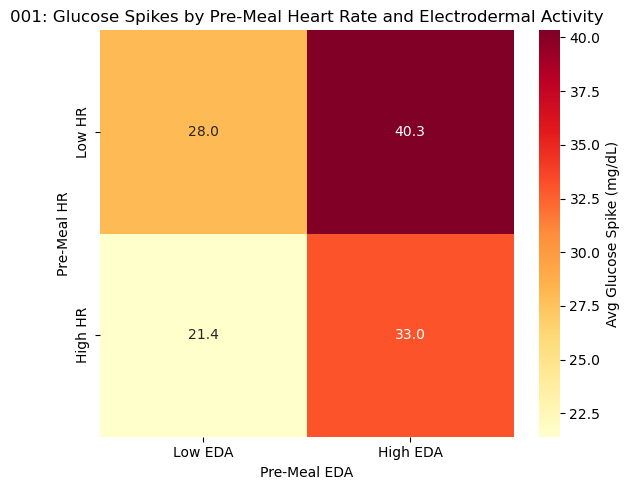

In [21]:
# Create pivot table
heatmap_data = biosignal_meals.pivot_table(
    values="glucose_spike",
    index=biosignal_meals["pre_hr"] >= biosignal_meals["pre_hr"].median(),
    columns=biosignal_meals["pre_eda"] >= biosignal_meals["pre_eda"].median(),
    aggfunc="mean"
)

# Label rows/columns
heatmap_data.index = heatmap_data.index.map({False: "Low HR", True: "High HR"})
heatmap_data.columns = heatmap_data.columns.map({False: "Low EDA", True: "High EDA"})

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    cbar_kws={'label': 'Avg Glucose Spike (mg/dL)'}
)
plt.title("001: Glucose Spikes by Pre-Meal Heart Rate and Electrodermal Activity")
plt.xlabel("Pre-Meal EDA")
plt.ylabel("Pre-Meal HR")
plt.tight_layout()

plt.savefig("outputs/001_biosignal_spike_heatmap.png", dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

Now do this for ALL participants, not just `001`.

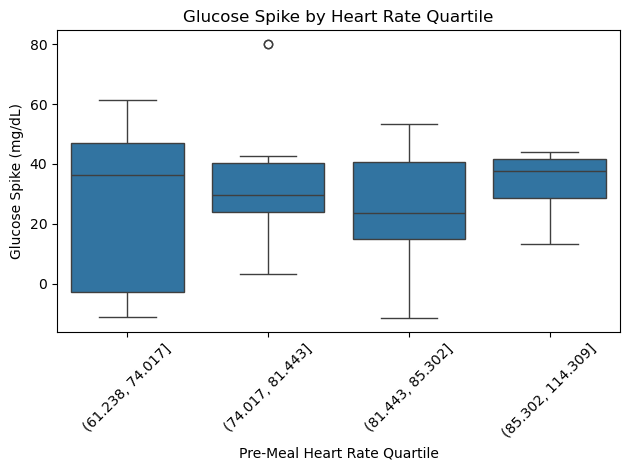

In [22]:
import seaborn as sns

# Bin HR or EDA into quantiles
biosignal_meals["hr_bin"] = pd.qcut(biosignal_meals["pre_hr"], q=4)
sns.boxplot(x="hr_bin", y="glucose_spike", data=biosignal_meals)
plt.title("Glucose Spike by Heart Rate Quartile")
plt.ylabel("Glucose Spike (mg/dL)")
plt.xlabel("Pre-Meal Heart Rate Quartile")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Meals eaten in the lowest HR state produced the largest and most variable glucose spikes, while moderate HR states had more stable responses.

Of course, this is only for participant `001`. Do this for ALL participants.

Let's try participant `009`.

### Participant 009

In [34]:
demo[demo['ID'] == 9] # prediabetic

,ID,Gender,HbA1c
10,9,MALE,6.1


In [23]:
# === Dexcom (Glucose) ===
dexcom_df = pd.read_csv("data/009/Dexcom_009.csv", skiprows=range(1, 13))
dexcom_df.columns = dexcom_df.columns.str.strip()
dexcom_df["datetime"] = pd.to_datetime(dexcom_df["Timestamp (YYYY-MM-DDThh:mm:ss)"], errors="coerce")
dexcom_df = dexcom_df.rename(columns={"Glucose Value (mg/dL)": "glucose"})
dexcom_df = dexcom_df[["datetime", "glucose"]].dropna()

In [24]:
# === Heart Rate ===
# Step 1: Load and clean column names
hr_df = pd.read_csv("data/009/HR_009.csv")
hr_df.columns = hr_df.columns.str.strip()

# Step 2: Convert datetime strings to actual datetime objects
hr_df["datetime"] = pd.to_datetime(hr_df["datetime"], errors="coerce")

# Step 3: Standardize the HR column name (assumes it's the second column)
hr_df = hr_df.rename(columns={hr_df.columns[1]: "hr"})

# Step 4: Floor to nearest minute (for consistent grouping)
hr_df["datetime"] = hr_df["datetime"].dt.floor("min")

# Step 5: Average HR per minute
hr_df = hr_df.groupby("datetime")["hr"].mean().reset_index()

# Preview the cleaned result
# hr_df.head()

In [25]:
# === Electrodermal Activity  ===
# Step 1: Load and strip column names
eda_df = pd.read_csv("data/009/EDA_009.csv")
eda_df.columns = eda_df.columns.str.strip()

# Step 2: Convert datetime column to actual datetime objects
eda_df["datetime"] = pd.to_datetime(eda_df["datetime"], errors="coerce")

# Step 3: Standardize the EDA column name (assumes it's the second column)
eda_df = eda_df.rename(columns={eda_df.columns[1]: "eda"})

# Step 4: Round to nearest minute
eda_df["datetime"] = eda_df["datetime"].dt.floor("min")

# Step 5: Average EDA per minute
eda_df = eda_df.groupby("datetime")["eda"].mean().reset_index()

# Preview
# eda_df.head()

In [26]:
# Step 1: Load food_log_tagged and group food items into meals
import json

with open("data/food_log_tagged.json") as f:
    food_data = json.load(f)

food_df = pd.DataFrame(food_data)
food_df["datetime"] = pd.to_datetime(food_df["datetime"], errors="coerce")

# Group by (ID, datetime) to define meals
grouped_meals = food_df.groupby(["ID", "datetime"]).agg({
    "time_begin": "first",
    "calorie": "sum",
    "total_carb": "sum",
    "dietary_fiber": "sum",
    "sugar": "sum",
    "protein": "sum",
    "total_fat": "sum",
    "tags": lambda x: sorted(set(tag for sublist in x if isinstance(sublist, list) for tag in sublist))
}).reset_index()

# Clean and parse time_begin
grouped_meals["time_begin"] = pd.to_datetime(grouped_meals["time_begin"], errors="coerce")

In [27]:
# Load flattened glucose data
with open("data/flattened_glucose.json") as f:
    glucose_data = json.load(f)

glucose_df = pd.DataFrame(glucose_data)
glucose_df["timestamp"] = pd.to_datetime(glucose_df["timestamp"], errors="coerce")

# Function to compute glucose spike
def compute_glucose_spike(pid, meal_time):
    window = glucose_df[(glucose_df["patient_id"] == pid) &
                        (glucose_df["timestamp"] >= meal_time - pd.Timedelta(minutes=30)) &
                        (glucose_df["timestamp"] <= meal_time + pd.Timedelta(minutes=120))]
    if window.empty:
        return None
    before = window[window["timestamp"] <= meal_time]["glucose"]
    after = window[window["timestamp"] > meal_time]["glucose"]
    if before.empty or after.empty:
        return None
    return after.max() - before.mean()

# Apply spike function to each meal
grouped_meals["glucose_spike"] = grouped_meals.apply(
    lambda row: compute_glucose_spike(row["ID"], row["time_begin"]),
    axis=1
)

# Drop meals without glucose spike info
spike_meals = grouped_meals.dropna(subset=["glucose_spike"]).copy()

In [28]:
# Initialize new columns
pre_hr_vals = []
pre_eda_vals = []

# For each meal, extract 30-min pre-window signals
for _, row in spike_meals.iterrows():
    start = row["time_begin"] - pd.Timedelta(minutes=30)
    end = row["time_begin"]

    hr_window = hr_df[(hr_df["datetime"] >= start) & (hr_df["datetime"] <= end)]
    eda_window = eda_df[(eda_df["datetime"] >= start) & (eda_df["datetime"] <= end)]

    pre_hr_vals.append(hr_window["hr"].mean() if not hr_window.empty else None)
    pre_eda_vals.append(eda_window["eda"].mean() if not eda_window.empty else None)

# Attach to the meal DataFrame
spike_meals["pre_hr"] = pre_hr_vals
spike_meals["pre_eda"] = pre_eda_vals

In [29]:
biosignal_meals = spike_meals.dropna(subset=["pre_hr", "pre_eda"]).copy()

In [30]:
# STEP 2: Compute medians
hr_thresh = biosignal_meals["pre_hr"].median()
eda_thresh = biosignal_meals["pre_eda"].median()

# Label quadrant
def label_quadrant(row):
    if row["pre_hr"] >= hr_thresh and row["pre_eda"] >= eda_thresh:
        return "High HR + High EDA"
    elif row["pre_hr"] >= hr_thresh:
        return "High HR + Low EDA"
    elif row["pre_eda"] >= eda_thresh:
        return "Low HR + High EDA"
    else:
        return "Low HR + Low EDA"

biosignal_meals["biosignal_quadrant"] = biosignal_meals.apply(label_quadrant, axis=1)

In [31]:
# STEP 3: Summarize spike data by quadrant
spike_summary = biosignal_meals.groupby("biosignal_quadrant")["glucose_spike"].agg(
    count="count",
    avg_spike="mean",
    std_spike="std"
).reset_index()

# Sort for readability
spike_summary = spike_summary.sort_values("avg_spike", ascending=False)

print(spike_summary)

   biosignal_quadrant  count  avg_spike  std_spike
0  High HR + High EDA     26  44.397436  29.993113
1   High HR + Low EDA     37  34.744144  31.546016
2   Low HR + High EDA     37  27.882883  33.428657
3    Low HR + Low EDA     25  24.000000  29.767657


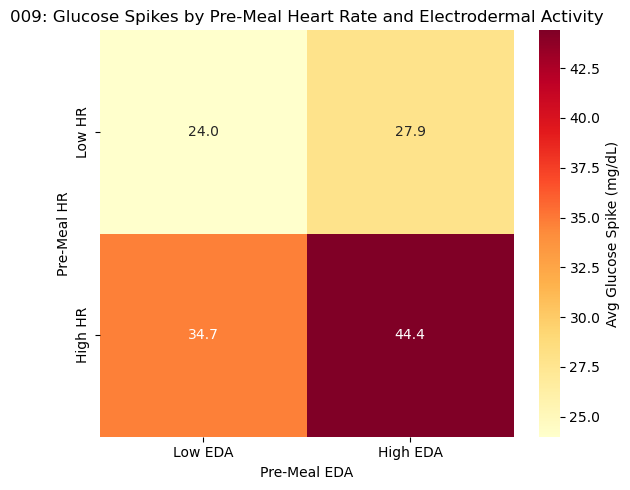

In [32]:
# Create pivot table
heatmap_data = biosignal_meals.pivot_table(
    values="glucose_spike",
    index=biosignal_meals["pre_hr"] >= biosignal_meals["pre_hr"].median(),
    columns=biosignal_meals["pre_eda"] >= biosignal_meals["pre_eda"].median(),
    aggfunc="mean"
)

# Label rows/columns
heatmap_data.index = heatmap_data.index.map({False: "Low HR", True: "High HR"})
heatmap_data.columns = heatmap_data.columns.map({False: "Low EDA", True: "High EDA"})

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    cbar_kws={'label': 'Avg Glucose Spike (mg/dL)'}
)
plt.title("009: Glucose Spikes by Pre-Meal Heart Rate and Electrodermal Activity")
plt.xlabel("Pre-Meal EDA")
plt.ylabel("Pre-Meal HR")
plt.tight_layout()

plt.savefig("outputs/009_biosignal_spike_heatmap.png", dpi=300, bbox_inches="tight", pad_inches=0.5)
plt.show()

## 🔥 Participant 009: Glucose Spikes by Pre-Meal HR and EDA

### 👤 Participant Profile

| Attribute     | Value         |
|---------------|---------------|
| **ID**        | 009           |
| **Gender**    | Male          |
| **HbA1c**     | 6.1%          |
| **Status**    | 🟠 Prediabetic |

Participant 009 has an HbA1c of 6.1%, placing him in the **prediabetic range**. This suggests that his body may have **reduced insulin sensitivity** or difficulty handling blood glucose after meals — especially under physiologically demanding conditions.

---

### 📊 Heatmap: Average Glucose Spike (mg/dL) by Pre-Meal Physiological State

|               | **Low EDA**   | **High EDA**  |
|---------------|---------------|---------------|
| **Low HR**    | 24.0 mg/dL    | 27.9 mg/dL    |
| **High HR**   | 34.7 mg/dL    | **44.4 mg/dL** 🔥 |

---

### 🔍 Interpretation

- The **highest glucose spikes** occurred when both **HR and EDA were elevated** — a state that reflects combined **physical and emotional arousal**
- Even when only **HR was high**, spike values increased noticeably
- The **lowest spikes** occurred in calm, low-HR, low-EDA conditions

---

### 🧠 What This Tells Us

> For this participant with elevated HbA1c, meals eaten in **stressed or activated physiological states** produced **much higher glucose spikes** than meals eaten while calm.

This supports the hypothesis that:
- **Stress and exertion amplify glucose responses**, particularly in metabolically vulnerable individuals
- **Internal state before eating** may be just as important as meal content

---

### 📎 Comparison Context (optional)

Compared to Participant 001 (HbA1c = 5.5%), who showed **smaller and more stable glucose responses**, Participant 009 exhibits a **sharper biosignal-dependent modulation of glycemic spikes**. This reinforces the idea that **biosignals may interact with metabolic status** to shape postprandial outcomes.
